# Cost and Time Deviation in Rural Roads Projects

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from cleaning_rural_roads import clean_data
from summary_rural_roads import deviation_summary
from summary_rural_roads import hplot_cost_deviation, vplot_cost_deviation

pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'serif'

In [3]:
# Set style
#plt.style.use('seaborn-paper')

# Set font sizes
#sns.set_context("paper") 

# Adjust font family if needed

# Set the color palette
#sns.set_palette("colorblind")
#plt.rcParams['figure.dpi'] = 200

In [4]:
datos = pd.read_csv("https://raw.githubusercontent.com/NicolasArrietaC/Cost-and-Time-Deviation-in-Colombian-Rural-Roads_extended_version/master/data/collected_obra_data_v2.csv")
datos.head()

,CONTRACT_ID,ENTITY_NAME,DEPARTMENT,MUNICIPALITY_TYPE,PROCESS_TYPE,CONTRACT_OBJECT,OBJETC_DETAIL,ESTIMATED_COST_ORIG,CONTRACT_VALUE_ORIG,ADDITIONAL_COST_ORIG,FINAL_COST_ORIG,YEAR,CONTRACT_DATE,START_DATE,ORIGINAL_DEADLINE,END_DATE,ID_ADJUDICACION,URLPROCESO,NIT_ENTIDAD,ID_CONTRATISTA,ESTIMATED_COST_NORM,CONTRACT_VALUE_NORM,ADDITIONAL_COST_NORM,FINAL_COST_NORM,ADDITIONAL_TIME,FINAL_DEADLINE,PROJECT_INTENSITY_NORM,PROJECT_INTENSITY_ORIG,AWARD_GROWTH_NORM,AWARD_GROWTH_ORIG,COST_DEVIATION_ORIG,COST_DEVIATION_NORM,TIME_DEVIATION,OWNER,REGION,GROUP,COST_GROUP_QUANTILE
0,19-4-9697142-8833779,CUNDINAMARCA - FONDO DE DESARROLLO DE PROYECTO...,BOGOTÁ D.C.,OTHER,RÉGIMEN ESPECIAL,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",CONSTRUCCION DE PLACA HUELLA EN LA VEREDA TERA...,3.600000e+07,3.600000e+07,0.0,3.600000e+07,2019,2019-06-04,2019-06-04,90,2019-09-04,8833779,{'url': 'https://www.contratos.gov.co/consulta...,900258772,900183596,43.472171,43.472171,0.0,43.472171,0,90,0.483024,4.000000e+05,0.0,0.0,0.0,0.0,0.0,DEPARTMENT_GOVERNMENT,ANDINA,Vias Rurales hasta 2020,2
1,19-13-9883504-9778150,CAUCA - ALCALDIA MUNICIPIO DE LOPEZ DE MICAY,CAUCA,TYPE_6,CONTRATACIÓN MÍNIMA CUANTÍA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",OBRAS DE MEJORAMIENTO; MANTENIMIENTO Y LIMPIEZ...,1.378400e+07,1.378400e+07,0.0,1.378400e+07,2019,2019-09-13,2019-09-13,6,2019-09-19,9778150,{'url': 'https://www.contratos.gov.co/consulta...,No Definido,1480265,16.645011,16.645011,0.0,16.645011,0,6,2.774169,2.297333e+06,0.0,0.0,0.0,0.0,0.0,MUNICIPALITY,PACIFICA,Vias Rurales hasta 2020,1
2,15-13-4420489-4153976,BOYACA - ALCALDIA MUNICIPIO DE PAYA,BOYACÁ,TYPE_6,CONTRATACIÓN MÍNIMA CUANTÍA,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO PUENTE SOBRE LA QUEBRADA CHIQUIT...,5.010100e+06,5.010100e+06,0.0,5.010100e+06,2015,2015-12-01,2015-12-01,10,2015-12-11,4153976,{'url': 'https://www.contratos.gov.co/consulta...,891801368-5,1115690328,7.775433,7.775433,0.0,7.775433,0,10,0.777543,5.010100e+05,0.0,0.0,0.0,0.0,0.0,MUNICIPALITY,ANDINA,Vias Rurales hasta 2020,1
3,17-12-6551225-5956454,ANTIOQUIA - ALCALDIA MUNICIPIO DE REMEDIOS,ANTIOQUIA,TYPE_4,CONTRATACIÓN DIRECTA (LEY 1150 DE 2007),"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",MANTENIMIENTO DE PUNTOS CRITICOS EN 35 METROS ...,5.600150e+06,5.600150e+06,0.0,5.600150e+06,2017,2017-04-07,2017-04-07,30,2017-05-07,5956454,{'url': 'https://www.contratos.gov.co/consulta...,890984312,800230048,7.591190,7.591190,0.0,7.591190,0,30,0.253040,1.866717e+05,0.0,0.0,0.0,0.0,0.0,MUNICIPALITY,ANDINA,Vias Rurales hasta 2020,1
4,19-12-9584188-8724012,CUNDINAMARCA - INSTITUTO DE INFRAESTRUCTURA Y ...,BOGOTÁ D.C.,OTHER,CONTRATACIÓN DIRECTA (LEY 1150 DE 2007),"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VÍAS",REMODELACION Y ADECUACION DEL CENRO CULTURAL A...,1.400000e+09,1.400000e+09,0.0,1.400000e+09,2019,2019-06-21,2019-06-28,180,2019-12-28,8724012,{'url': 'https://www.contratos.gov.co/consulta...,900258711,800094622,1690.584411,1690.584411,0.0,1690.584411,0,180,9.392136,7.777778e+06,0.0,0.0,0.0,0.0,0.0,DEPARTMENT_GOVERNMENT,ANDINA,Vias Rurales hasta 2020,4


In [5]:
# Cleaning data
df = clean_data(datos)

Before of cleaning the database 4473 rows
Before of cleaning the database has 1751 rows


In [6]:
df.to_clipboard()

In [68]:
df.columns

Index(['CONTRACT_ID', 'ENTITY_NAME', 'DEPARTMENT', 'MUNICIPALITY_TYPE',
       'PROCESS_TYPE', 'CONTRACT_OBJECT', 'OBJETC_DETAIL',
       'ESTIMATED_COST_ORIG', 'CONTRACT_VALUE_ORIG', 'ADDITIONAL_COST_ORIG',
       'FINAL_COST_ORIG', 'YEAR', 'CONTRACT_DATE', 'START_DATE',
       'ORIGINAL_DEADLINE', 'END_DATE', 'ID_ADJUDICACION', 'URLPROCESO',
       'NIT_ENTIDAD', 'ID_CONTRATISTA', 'ESTIMATED_COST_NORM',
       'CONTRACT_VALUE_NORM', 'ADDITIONAL_COST_NORM', 'FINAL_COST_NORM',
       'ADDITIONAL_TIME', 'FINAL_DEADLINE', 'PROJECT_INTENSITY_NORM',
       'PROJECT_INTENSITY_ORIG', 'AWARD_GROWTH_NORM', 'AWARD_GROWTH_ORIG',
       'COST_DEVIATION_ORIG', 'COST_DEVIATION_NORM', 'TIME_DEVIATION', 'OWNER',
       'REGION', 'GROUP', 'COST_GROUP_QUANTILE',
       'CONTRACT_VALUE_ORIG_MILLIONS', 'ADDITIONAL_COST_ORIG_MILLIONS',
       'FINAL_COST_ORIG_MILLIONS', 'PROCESS_TYPE_MOD',
       'TIPO_OBRA_CONSTRUCCION', 'TIPO_OBRA_MANTENIMIENTO',
       'TIPO_OBRA_REHABILITACION', 'TIPO_OBRA_MEJORAMIENT

## Exploratory Data Analysis

In [7]:
df['CONTRACT_VALUE_ORIG_MILLIONS'].describe()

count     1751.000000
mean       264.773411
std       1091.804375
min         20.029440
25%         50.000000
50%        100.000000
75%        131.049531
max      23005.379765
Name: CONTRACT_VALUE_ORIG_MILLIONS, dtype: float64

In [8]:
df['AWARD_GROWTH_ORIG'].describe()

count    1751.000000
mean       -0.515389
std         4.360404
min       -74.910971
25%        -0.000091
50%         0.000000
75%         0.000000
max        49.528826
Name: AWARD_GROWTH_ORIG, dtype: float64

In [9]:
df.loc[df['PROCESS_TYPE_MOD'] == 'Special Regime',['CONTRACT_ID','ENTITY_NAME','OBJETC_DETAIL',
       'ESTIMATED_COST_ORIG', 'CONTRACT_VALUE_ORIG', 'ADDITIONAL_COST_ORIG',
       'FINAL_COST_ORIG','URLPROCESO']].to_clipboard()

In [10]:
df['ENTITY_NAME'].value_counts()

ENTITY_NAME
CUNDINAMARCA - INSTITUTO DE INFRAESTRUCTURA Y CONCESIONES DE CUNDINAMARCA - ICCU    1042
ANTIOQUIA - ALCALDIA MUNICIPIO DE REMEDIOS                                            15
CUNDINAMARCA - ALCALDIA MUNICIPIO DE PAIME                                            13
NARINO - ALCALDIA MUNICIPIO DE ARBOLEDA (BERRUECOS)                                   12
ANTIOQUIA - ALCALDIA MUNICIPIO DE GUARNE                                              12
                                                                                    ... 
TOLIMA - ALCALDIA MUNICIPIO DE DOLORES                                                 1
CUNDINAMARCA - ALCALDIA MUNICIPIO DE ARBELAEZ                                          1
VALLE DEL CAUCA - ALCALDIA MUNICIPIO DE RIOFRIO                                        1
CUNDINAMARCA - ALCALDIA MUNICIPIO DE CAPARRAPI                                         1
BOYACA - ALCALDIA MUNICIPIO DE TUTAZA                                                  1
Name: cou

In [11]:
df.columns

Index(['CONTRACT_ID', 'ENTITY_NAME', 'DEPARTMENT', 'MUNICIPALITY_TYPE',
       'PROCESS_TYPE', 'CONTRACT_OBJECT', 'OBJETC_DETAIL',
       'ESTIMATED_COST_ORIG', 'CONTRACT_VALUE_ORIG', 'ADDITIONAL_COST_ORIG',
       'FINAL_COST_ORIG', 'YEAR', 'CONTRACT_DATE', 'START_DATE',
       'ORIGINAL_DEADLINE', 'END_DATE', 'ID_ADJUDICACION', 'URLPROCESO',
       'NIT_ENTIDAD', 'ID_CONTRATISTA', 'ESTIMATED_COST_NORM',
       'CONTRACT_VALUE_NORM', 'ADDITIONAL_COST_NORM', 'FINAL_COST_NORM',
       'ADDITIONAL_TIME', 'FINAL_DEADLINE', 'PROJECT_INTENSITY_NORM',
       'PROJECT_INTENSITY_ORIG', 'AWARD_GROWTH_NORM', 'AWARD_GROWTH_ORIG',
       'COST_DEVIATION_ORIG', 'COST_DEVIATION_NORM', 'TIME_DEVIATION', 'OWNER',
       'REGION', 'GROUP', 'COST_GROUP_QUANTILE',
       'CONTRACT_VALUE_ORIG_MILLIONS', 'ADDITIONAL_COST_ORIG_MILLIONS',
       'FINAL_COST_ORIG_MILLIONS', 'PROCESS_TYPE_MOD',
       'TIPO_OBRA_CONSTRUCCION', 'TIPO_OBRA_MANTENIMIENTO',
       'TIPO_OBRA_REHABILITACION', 'TIPO_OBRA_MEJORAMIENT

## Cost Deviation

### Summary of cost deviation

In [12]:
#dev_cost_data = df.loc[df['COST_DEVIATION_FREC'] > 0]['COST_DEVIATION_ORIG'].copy()
dev_cost_summary = pd.DataFrame({
    'Estadística':['N', 'Frequency', 'Frequency Cost Deviation (%)', 'Average Magnitude Deviation (%)', 
                   'Min Magnitude Deviation (%)', 'Max Magnitude Deviation (%)', 'Standard Deviation Magnitude',
                   'Coefficient of Variation'],
    'Valor': [df.shape[0], 
              df['COST_DEVIATION_FREC'].sum(), 
              df['COST_DEVIATION_FREC'].mean()*100, 
              df['COST_DEVIATION_ORIG'].mean()*100,
              df['COST_DEVIATION_ORIG'].min()*100,
              df['COST_DEVIATION_ORIG'].max()*100,
              df['COST_DEVIATION_ORIG'].std()*100,
              (df['COST_DEVIATION_ORIG'].std()/df['COST_DEVIATION_ORIG'].mean())*100]
})
print(dev_cost_summary)
print("-"*50)
print(df['COST_DEVIATION_ORIG'].describe())

                       Estadística        Valor
0                                N  1751.000000
1                        Frequency   149.000000
2     Frequency Cost Deviation (%)     8.509423
3  Average Magnitude Deviation (%)     2.546861
4      Min Magnitude Deviation (%)     0.000000
5      Max Magnitude Deviation (%)    80.932341
6     Standard Deviation Magnitude     9.750305
7         Coefficient of Variation   382.836160
--------------------------------------------------
count    1751.000000
mean        0.025469
std         0.097503
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.809323
Name: COST_DEVIATION_ORIG, dtype: float64


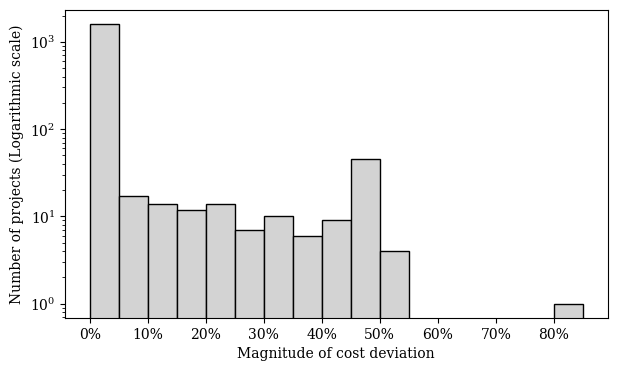

In [64]:
# Crear histograma
plt.figure(figsize=(7,4))
plt.hist(df['COST_DEVIATION_ORIG'], edgecolor='black', bins=np.arange(0, 0.9, 0.05), color='lightgrey')
plt.xticks(np.arange(0, 0.9, 0.1))
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()])
plt.xlabel('Magnitude of cost deviation')
plt.yscale('log')
plt.ylabel('Number of projects (Logarithmic scale)')
plt.show()

### Contract value range

In [69]:
# Summary of cost deviation by contract value range
cost_dev_value = deviation_summary(df, 
                                   cost_var='CONTRACT_VALUE_ORIG_MILLIONS',
                                   duration_var='ORIGINAL_DEADLINE',
                                   aggregate_var='CONTRACT_VALUE_RANGE',
                                   frequency_var='COST_DEVIATION_FREC',
                                   magnitude_var='COST_DEVIATION_ORIG')
cost_dev_value.to_clipboard()
cost_dev_value

,CONTRACT_VALUE_RANGE_,CONTRACT_VALUE_ORIG_MILLIONS_MEAN,ORIGINAL_DEADLINE_MEAN,CONTRACT_VALUE_RANGE_N,CONTRACT_VALUE_RANGE_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,(20-100],69.153714,171.932621,1217,0.695031,49,0.040263,0.015431
1,(100-500],204.996079,138.120098,408,0.233010,65,0.159314,0.043959
2,(500-1000],742.892038,115.706897,58,0.033124,16,0.275862,0.048155
3,>1000,3716.647557,176.647059,68,0.038835,19,0.279412,0.074819


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'

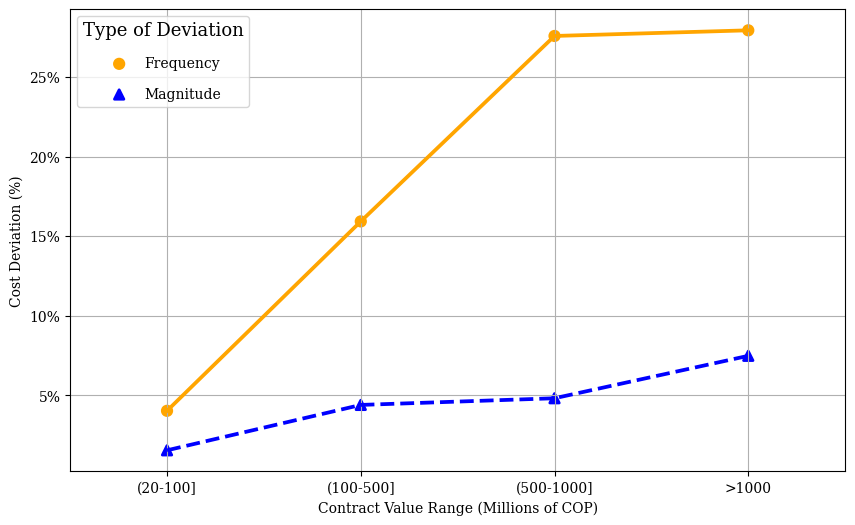

In [16]:
# Plot cost deviation summary
hplot_cost_deviation(cost_dev_value, 'CONTRACT_VALUE_RANGE_', 'COST_DEVIATION_FREC_MEAN', 'COST_DEVIATION_ORIG_MEAN', 
                    'Contract Value Range (Millions of COP)', 'Cost Deviation (%)')

### Type of process

In [70]:
cost_dev_process = deviation_summary(df, 
                                    cost_var='CONTRACT_VALUE_ORIG_MILLIONS',
                                    duration_var='ORIGINAL_DEADLINE',
                                    aggregate_var='PROCESS_TYPE_MOD',
                                    frequency_var='COST_DEVIATION_FREC',
                                    magnitude_var='COST_DEVIATION_ORIG')
cost_dev_process.to_clipboard()
cost_dev_process

,PROCESS_TYPE_MOD_,CONTRACT_VALUE_ORIG_MILLIONS_MEAN,ORIGINAL_DEADLINE_MEAN,PROCESS_TYPE_MOD_N,PROCESS_TYPE_MOD_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,Direct Contracting,108.146471,214.236036,1110,0.633923,9,0.008108,0.003208
1,Special Regime,2708.004064,100.916667,36,0.020560,5,0.138889,0.037986
2,Minimum Amount,23.801016,30.626667,150,0.085665,22,0.146667,0.051439
3,Abbreviated Selection,155.476092,69.673540,291,0.166191,65,0.223368,0.072546
4,Bidding,1202.889137,109.841463,164,0.093661,48,0.292683,0.066100


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

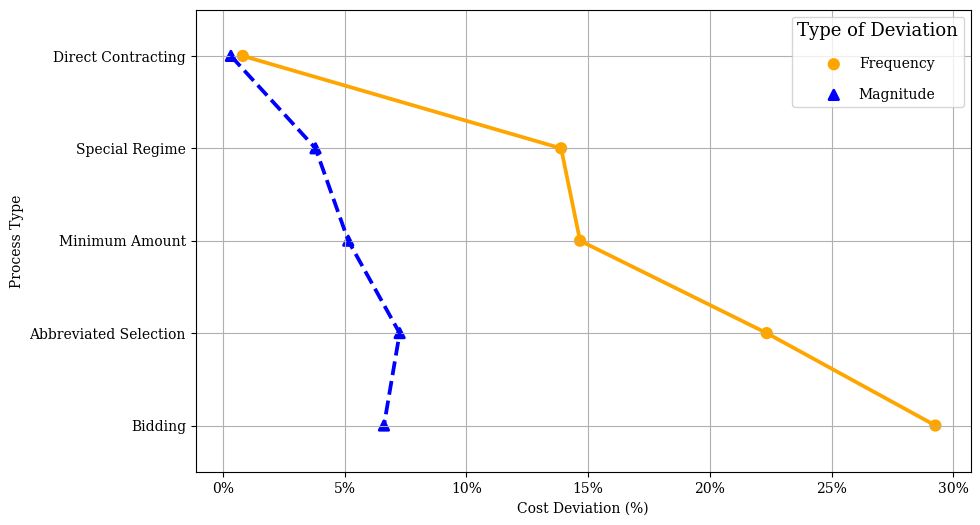

In [18]:
vplot_cost_deviation(cost_dev_process, 
                     'COST_DEVIATION_FREC_MEAN', 
                     'COST_DEVIATION_ORIG_MEAN', 
                     'PROCESS_TYPE_MOD_', 
                     'Cost Deviation (%)',
                     'Process Type')

### Type of project

In [19]:
cost_dev_type_project = deviation_summary(df, aggregate_var='TYPE_WORK',
                                   frequency_var='COST_DEVIATION_FREC',
                                   magnitude_var='COST_DEVIATION_ORIG')
cost_dev_type_project.to_clipboard()
cost_dev_type_project

,TYPE_WORK_,TYPE_WORK_N,TYPE_WORK_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,Construction,161,0.091947,28,0.173913,0.056169
1,Improvement,42,0.023986,13,0.309524,0.119294
2,Rehabilitation,1371,0.782981,74,0.053975,0.013590
3,Maintenance,151,0.086236,31,0.205298,0.070263
4,Others,26,0.014849,3,0.115385,0.050029


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

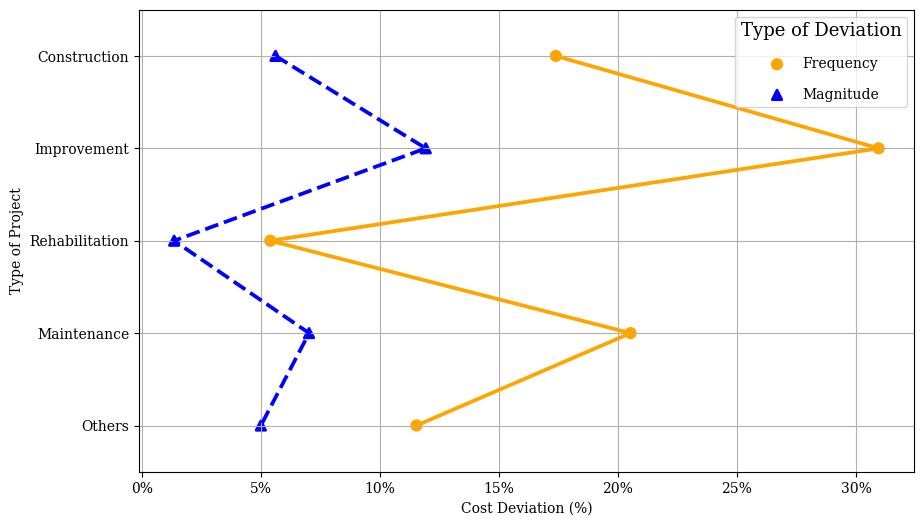

In [20]:
vplot_cost_deviation(cost_dev_type_project, 'COST_DEVIATION_FREC_MEAN', 'COST_DEVIATION_ORIG_MEAN', 'TYPE_WORK_', 
                    'Cost Deviation (%)','Type of Project')

### Muncipality type

In [21]:
cost_dev_muncipality = deviation_summary(df, aggregate_var='MUNICIPALITY_TYPE',
                                   frequency_var='COST_DEVIATION_FREC',
                                   magnitude_var='COST_DEVIATION_ORIG')
cost_dev_muncipality.to_clipboard()
cost_dev_muncipality

,MUNICIPALITY_TYPE_,MUNICIPALITY_TYPE_N,MUNICIPALITY_TYPE_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,Type 1,13,0.007424,3,0.230769,0.074875
1,Type 2,42,0.023986,4,0.095238,0.028573
2,Type 3,15,0.008567,8,0.533333,0.178234
3,Type 4,39,0.022273,4,0.102564,0.050179
4,Type 5,36,0.020560,12,0.333333,0.129777
5,Type 6,523,0.298686,112,0.214149,0.060156
6,Other,1083,0.618504,6,0.005540,0.001531


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

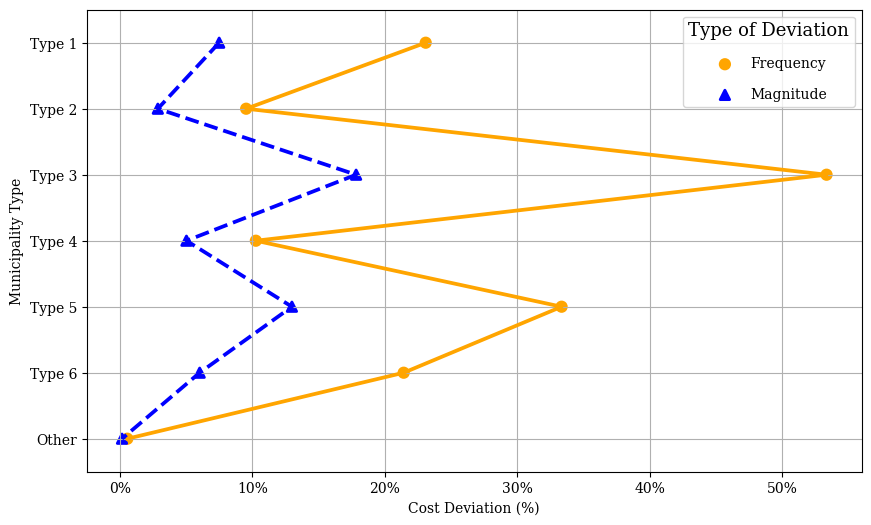

In [22]:
vplot_cost_deviation(cost_dev_muncipality, 'COST_DEVIATION_FREC_MEAN', 'COST_DEVIATION_ORIG_MEAN', 'MUNICIPALITY_TYPE_', 
                    'Cost Deviation (%)','Municipality Type')

### Region

In [23]:
df[df['REGION'] == 'OTRA']['DEPARTMENT'].unique()

array([], dtype=object)

In [24]:
df['REGION'] = df['REGION'].str.title() 
df['REGION'] = df['REGION'].replace({'Orinoquia':'Orinoquía','Pacifica':'Pacífica','Otra':'Distrito Capital'})

In [25]:
cost_dev_region = deviation_summary(df, aggregate_var='REGION',
                                   frequency_var='COST_DEVIATION_FREC',
                                   magnitude_var='COST_DEVIATION_ORIG')
cost_dev_region.to_clipboard()
cost_dev_region.fillna(0, inplace=True)
cost_dev_region

,REGION_,REGION_N,REGION_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,Amazonia,23,0.013135,2,0.086957,0.027927
1,Andina,1551,0.885780,113,0.072856,0.021020
2,Caribe,31,0.017704,4,0.129032,0.053408
3,Orinoquía,63,0.035979,19,0.301587,0.084683
4,Pacífica,83,0.047401,11,0.132530,0.052533


/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()])


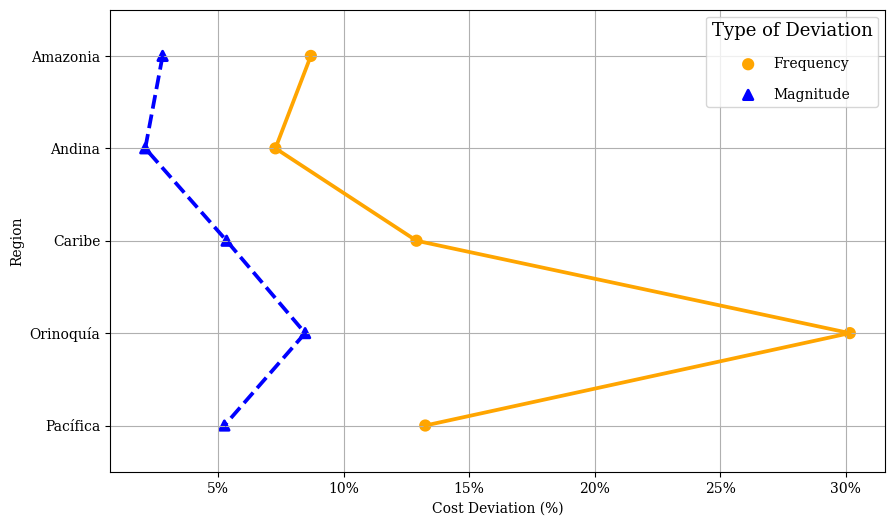

In [26]:
vplot_cost_deviation(cost_dev_region, 'COST_DEVIATION_FREC_MEAN', 'COST_DEVIATION_ORIG_MEAN', 'REGION_', 
                    'Cost Deviation (%)','Region')

### Award Growth

In [27]:
df['AWARD_GROWTH_ORIG'].describe()

count    1751.000000
mean       -0.515389
std         4.360404
min       -74.910971
25%        -0.000091
50%         0.000000
75%         0.000000
max        49.528826
Name: AWARD_GROWTH_ORIG, dtype: float64

In [28]:
df.groupby(['AWARD_GROWTH_DIRECTION']).size()

/var/folders/yv/nqf1_stj1lsb93l9v9j6z2h00000gn/T/ipykernel_3069/359949629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AWARD_GROWTH_DIRECTION']).size()


AWARD_GROWTH_DIRECTION
Decrease     468
Equal       1280
Increase       3
dtype: int64

In [29]:
cost_dev_award = deviation_summary(df, aggregate_var='AWARD_GROWTH_DIRECTION',
                                   frequency_var='COST_DEVIATION_FREC',
                                   magnitude_var='COST_DEVIATION_ORIG')
cost_dev_award.to_clipboard()
cost_dev_award

,AWARD_GROWTH_DIRECTION_,AWARD_GROWTH_DIRECTION_N,AWARD_GROWTH_DIRECTION_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,Decrease,468,0.267276,111,0.237179,0.068456
1,Equal,1280,0.731011,37,0.028906,0.009773
2,Increase,3,0.001713,1,0.333333,0.016029


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

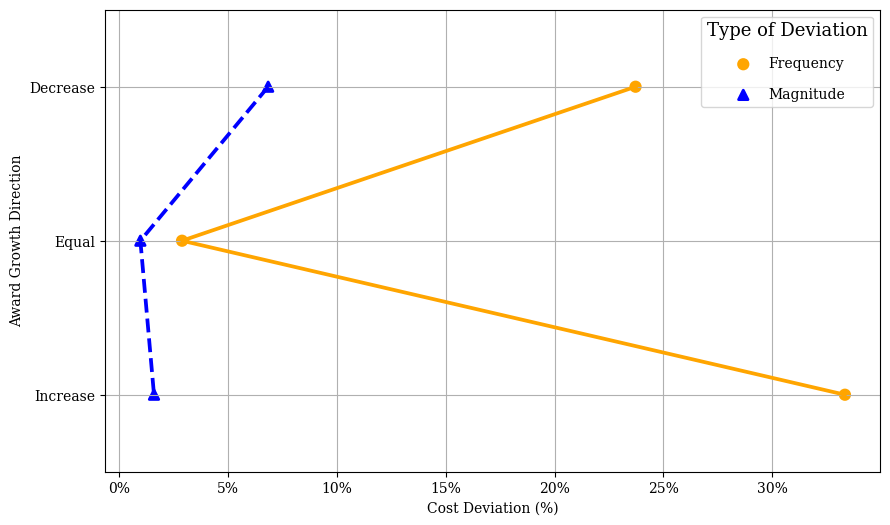

In [30]:
vplot_cost_deviation(cost_dev_award, 'COST_DEVIATION_FREC_MEAN', 'COST_DEVIATION_ORIG_MEAN', 'AWARD_GROWTH_DIRECTION_', 
                    'Cost Deviation (%)','Award Growth Direction')

### Project Intensity

In [31]:
(df['PROJECT_INTENSITY_ORIG']/1e6).describe()

count    1751.000000
mean        2.226811
std         5.970941
min         0.026642
25%         0.375000
50%         0.555556
75%         1.666638
max       142.857143
Name: PROJECT_INTENSITY_ORIG, dtype: float64

<Axes: xlabel='PROJECT_INTENSITY_RANGE'>

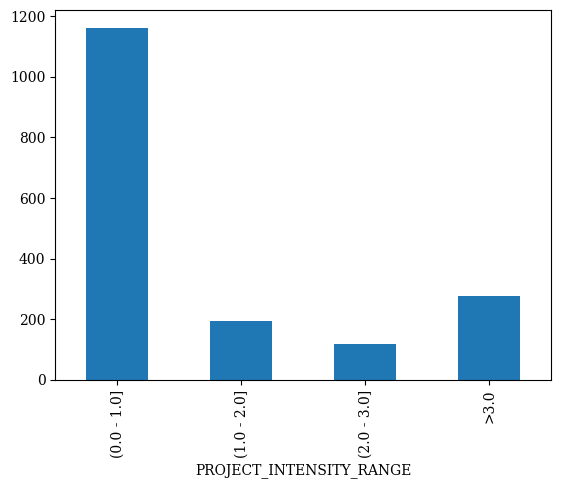

In [32]:
df['PROJECT_INTENSITY_RANGE'].value_counts(sort=False).plot.bar()

In [33]:
cost_dev_project_intensity = deviation_summary(df, aggregate_var='PROJECT_INTENSITY_RANGE',
                                   frequency_var='COST_DEVIATION_FREC',
                                   magnitude_var='COST_DEVIATION_ORIG')
cost_dev_project_intensity['COST_DEVIATION_ORIG_MEAN'].fillna(0, inplace=True)
cost_dev_project_intensity.to_clipboard()
cost_dev_project_intensity

,PROJECT_INTENSITY_RANGE_,PROJECT_INTENSITY_RANGE_N,PROJECT_INTENSITY_RANGE_Percent,COST_DEVIATION_FREC_COUNT,COST_DEVIATION_FREC_MEAN,COST_DEVIATION_ORIG_MEAN
0,(0.0 - 1.0],1163,0.664192,22,0.018917,0.006802
1,(1.0 - 2.0],195,0.111365,32,0.164103,0.060263
2,(2.0 - 3.0],118,0.067390,26,0.220339,0.061350
3,>3.0,275,0.157053,69,0.250909,0.064341


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'

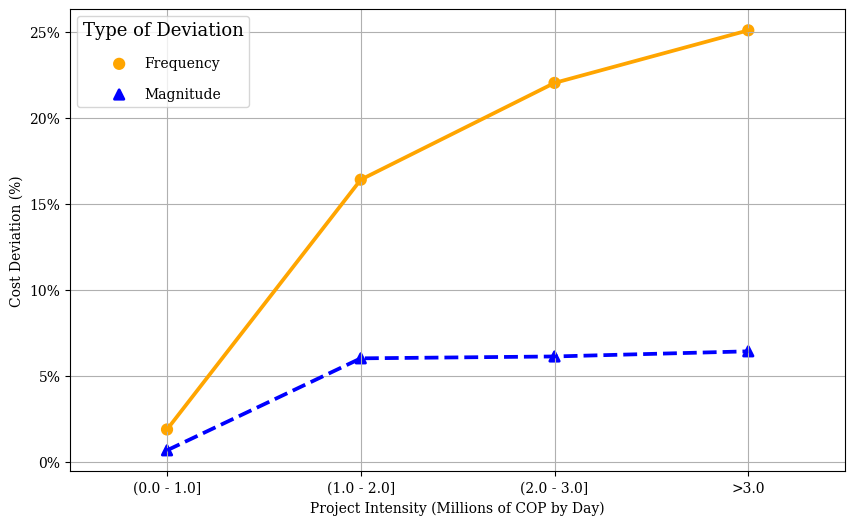

In [34]:
# Plot cost deviation summary
hplot_cost_deviation(cost_dev_project_intensity, 'PROJECT_INTENSITY_RANGE_', 'COST_DEVIATION_FREC_MEAN', 'COST_DEVIATION_ORIG_MEAN', 
                    'Project Intensity (Millions of COP by Day)', 'Cost Deviation (%)')

## Schedule Deviation

In [53]:
#dev_time_data = df.loc[df['TIME_DEVIATION_FREC'] > 0]['TIME_DEVIATION'].copy()
dev_time_summary = pd.DataFrame({
    'Estadística':['N', 'Frequency', 'Frequency Schedule Deviation (%)', 'Average Magnitude Deviation (%)', 
                   'Min Magnitude Deviation (%)', 'Max Magnitude Deviation (%)', 'Standard Deviation Magnitude',
                   'Coefficient of Variation'],
    'Valor': [df.shape[0], 
              df['TIME_DEVIATION_FREC'].sum(), 
              df['TIME_DEVIATION_FREC'].mean()*100, 
              df['TIME_DEVIATION'].mean()*100,
              df['TIME_DEVIATION'].min()*100,
              df['TIME_DEVIATION'].max()*100,
              df['TIME_DEVIATION'].std()*100,
              df['TIME_DEVIATION'].std()/df['TIME_DEVIATION'].mean()*100]
})
print(dev_time_summary)
print("-"*50)
print(df['TIME_DEVIATION'].describe())

                        Estadística        Valor
0                                 N  1751.000000
1                         Frequency   144.000000
2  Frequency Schedule Deviation (%)     8.223872
3   Average Magnitude Deviation (%)     6.823864
4       Min Magnitude Deviation (%)     0.000000
5       Max Magnitude Deviation (%)   450.000000
6      Standard Deviation Magnitude    31.521584
7          Coefficient of Variation   461.931595
--------------------------------------------------
count    1751.000000
mean        0.068239
std         0.315216
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.500000
Name: TIME_DEVIATION, dtype: float64


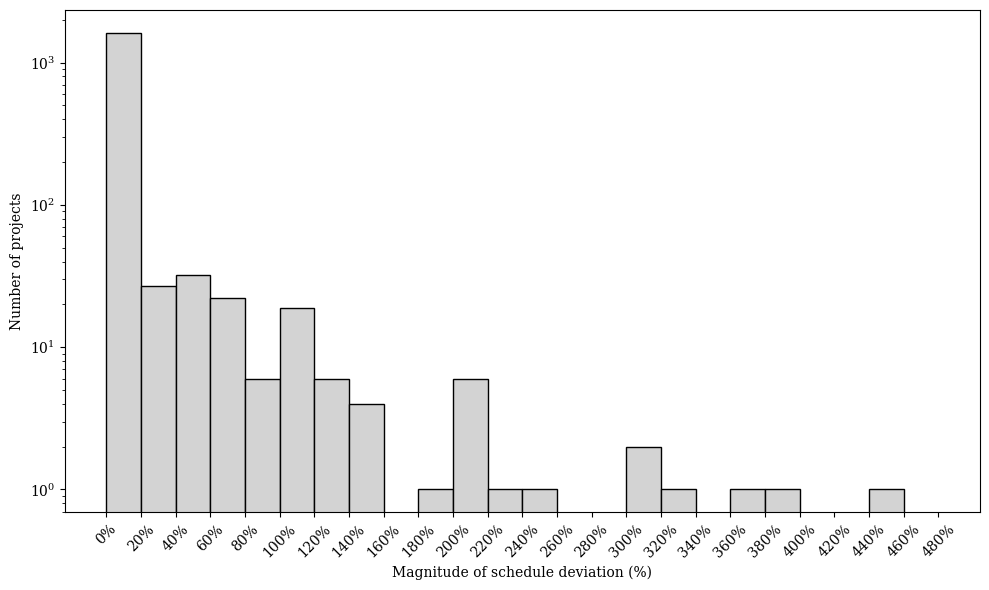

In [55]:
# Crear histograma
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
plt.hist(df['TIME_DEVIATION'], edgecolor='black', bins=np.arange(0, 5.0, 0.2), color='lightgray')
plt.xticks(np.arange(0, 5.0, 0.2))

# Rotar las etiquetas del eje X para mejor visualización
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()], rotation=45)

plt.xlabel('Magnitude of schedule deviation (%)')
plt.ylabel('Number of projects')
plt.yscale('log')
plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en el área de la figura
plt.show()


### Contract value range

In [37]:
# Summary of schedule deviation by contract value range
time_dev_value = deviation_summary(df, aggregate_var='CONTRACT_VALUE_RANGE',
                                   frequency_var='TIME_DEVIATION_FREC',
                                   magnitude_var='TIME_DEVIATION')
time_dev_value.to_clipboard()
time_dev_value

,CONTRACT_VALUE_RANGE_,CONTRACT_VALUE_RANGE_N,CONTRACT_VALUE_RANGE_Percent,TIME_DEVIATION_FREC_COUNT,TIME_DEVIATION_FREC_MEAN,TIME_DEVIATION_MEAN
0,(20-100],1217,0.695031,36,0.029581,0.022982
1,(100-500],408,0.233010,62,0.151961,0.115871
2,(500-1000],58,0.033124,15,0.258621,0.255364
3,>1000,68,0.038835,31,0.455882,0.432805


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'

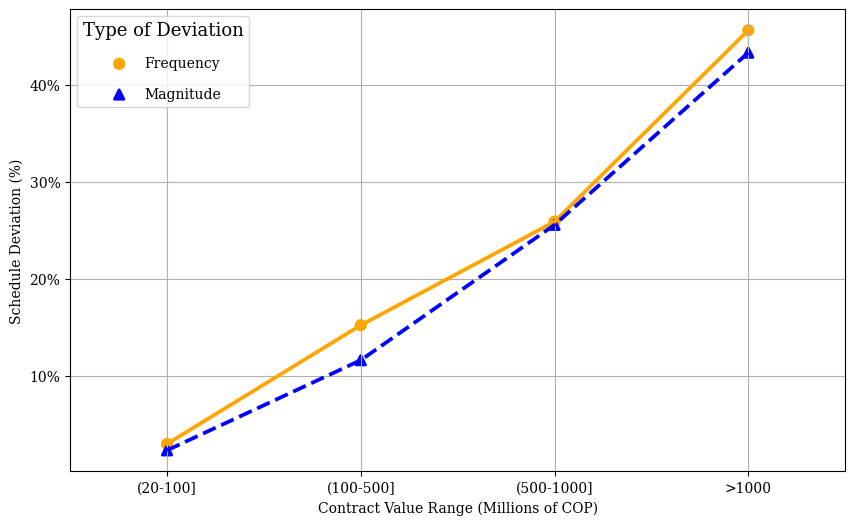

In [38]:
# Plot cost deviation summary
hplot_cost_deviation(time_dev_value, 
                     'CONTRACT_VALUE_RANGE_', 
                     'TIME_DEVIATION_FREC_MEAN', 
                     'TIME_DEVIATION_MEAN', 
                     'Contract Value Range (Millions of COP)', 
                     'Schedule Deviation (%)')

### Type of process

In [39]:
time_dev_process = deviation_summary(df, aggregate_var='PROCESS_TYPE_MOD',
                                   frequency_var='TIME_DEVIATION_FREC',
                                   magnitude_var='TIME_DEVIATION')
time_dev_process.to_clipboard()
time_dev_process

,PROCESS_TYPE_MOD_,PROCESS_TYPE_MOD_N,PROCESS_TYPE_MOD_Percent,TIME_DEVIATION_FREC_COUNT,TIME_DEVIATION_FREC_MEAN,TIME_DEVIATION_MEAN
0,Direct Contracting,1110,0.633923,13,0.011712,0.012399
1,Special Regime,36,0.020560,9,0.250000,0.291006
2,Minimum Amount,150,0.085665,10,0.066667,0.039500
3,Abbreviated Selection,291,0.166191,53,0.182131,0.148475
4,Bidding,164,0.093661,59,0.359756,0.281190


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

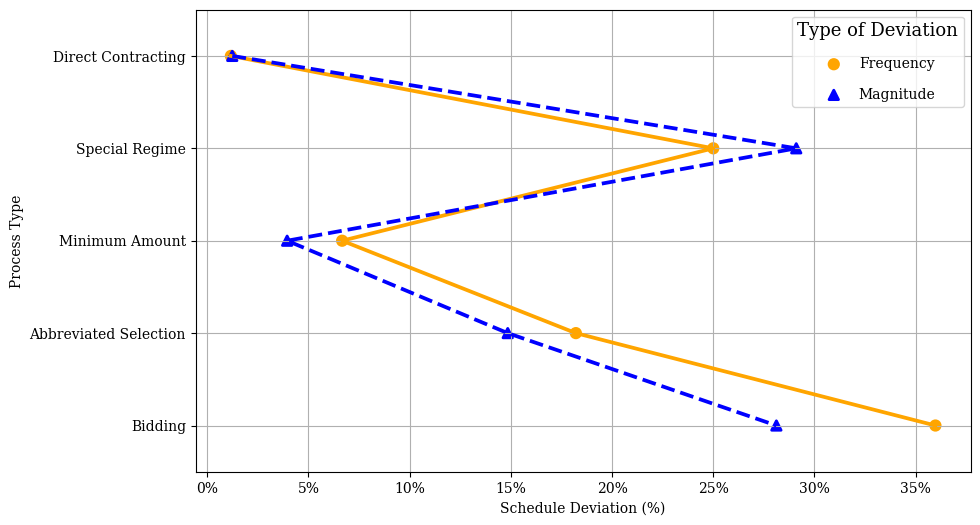

In [40]:
vplot_cost_deviation(time_dev_process, 
                     'TIME_DEVIATION_FREC_MEAN', 
                     'TIME_DEVIATION_MEAN', 
                     'PROCESS_TYPE_MOD_', 
                     'Schedule Deviation (%)',
                     'Process Type')

### Type of project

In [41]:
time_dev_type_project = deviation_summary(df, aggregate_var='TYPE_WORK',
                                   frequency_var='TIME_DEVIATION_FREC',
                                   magnitude_var='TIME_DEVIATION')
time_dev_type_project.to_clipboard()
time_dev_type_project

,TYPE_WORK_,TYPE_WORK_N,TYPE_WORK_Percent,TIME_DEVIATION_FREC_COUNT,TIME_DEVIATION_FREC_MEAN,TIME_DEVIATION_MEAN
0,Construction,161,0.091947,31,0.192547,0.137427
1,Improvement,42,0.023986,10,0.238095,0.152579
2,Rehabilitation,1371,0.782981,78,0.056893,0.049778
3,Maintenance,151,0.086236,23,0.152318,0.139336
4,Others,26,0.014849,2,0.076923,0.064103


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

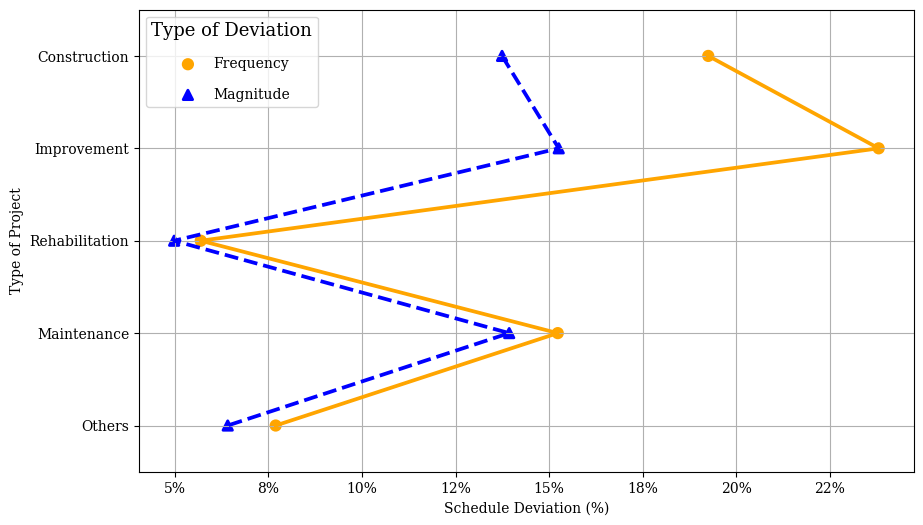

In [42]:
vplot_cost_deviation(time_dev_type_project, 
                     'TIME_DEVIATION_FREC_MEAN', 
                     'TIME_DEVIATION_MEAN', 
                     'TYPE_WORK_', 
                     'Schedule Deviation (%)',
                     'Type of Project')

### Award Growth

In [43]:
time_dev_award = deviation_summary(df, aggregate_var='AWARD_GROWTH_DIRECTION',
                                   frequency_var='TIME_DEVIATION_FREC',
                                   magnitude_var='TIME_DEVIATION')
time_dev_award['TIME_DEVIATION_MEAN'] = time_dev_award['TIME_DEVIATION_MEAN'].fillna(0)
time_dev_award.to_clipboard()
time_dev_award

,AWARD_GROWTH_DIRECTION_,AWARD_GROWTH_DIRECTION_N,AWARD_GROWTH_DIRECTION_Percent,TIME_DEVIATION_FREC_COUNT,TIME_DEVIATION_FREC_MEAN,TIME_DEVIATION_MEAN
0,Decrease,468,0.267276,107,0.228632,0.177757
1,Equal,1280,0.731011,37,0.028906,0.028356
2,Increase,3,0.001713,0,0.000000,0.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'

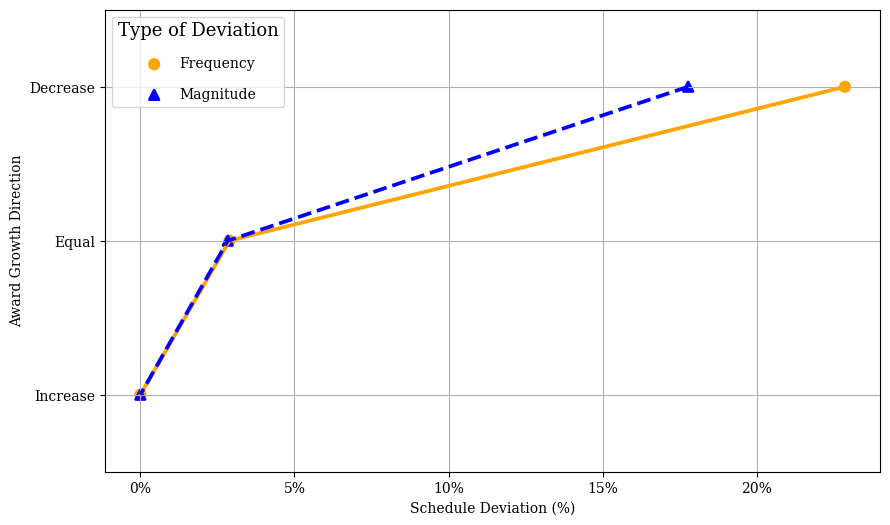

In [44]:
vplot_cost_deviation(time_dev_award, 
                     'TIME_DEVIATION_FREC_MEAN', 
                     'TIME_DEVIATION_MEAN', 
                     'AWARD_GROWTH_DIRECTION_', 
                     'Schedule Deviation (%)',
                     'Award Growth Direction')

### Project Intensity

In [45]:
time_dev_project_intensity = deviation_summary(df, aggregate_var='PROJECT_INTENSITY_RANGE',
                                   frequency_var='TIME_DEVIATION_FREC',
                                   magnitude_var='TIME_DEVIATION')
#time_dev_project_intensity['COST_DEVIATION_ORIG_MEAN'].fillna(0, inplace=True)
time_dev_project_intensity.to_clipboard()
time_dev_project_intensity

,PROJECT_INTENSITY_RANGE_,PROJECT_INTENSITY_RANGE_N,PROJECT_INTENSITY_RANGE_Percent,TIME_DEVIATION_FREC_COUNT,TIME_DEVIATION_FREC_MEAN,TIME_DEVIATION_MEAN
0,(0.0 - 1.0],1163,0.664192,14,0.012038,0.006219
1,(1.0 - 2.0],195,0.111365,21,0.107692,0.076239
2,(2.0 - 3.0],118,0.067390,23,0.194915,0.120315
3,>3.0,275,0.157053,86,0.312727,0.302506


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hfelizzola/OneDrive - Universidad de La Salle/Articulos/Analisis de desviaciones en vias rurales/Analisis/summary_rural_roads.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'

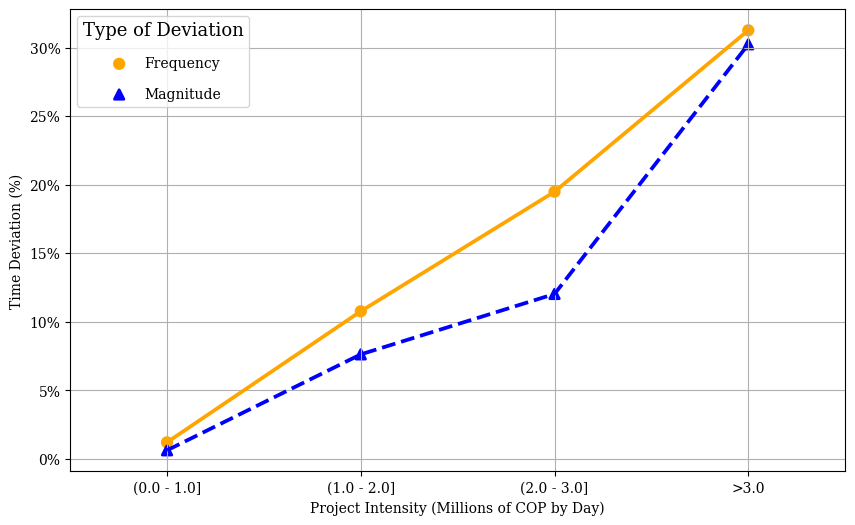

In [46]:
# Plot cost deviation summary
hplot_cost_deviation(time_dev_project_intensity, 
                     'PROJECT_INTENSITY_RANGE_', 
                     'TIME_DEVIATION_FREC_MEAN', 
                     'TIME_DEVIATION_MEAN', 
                     'Project Intensity (Millions of COP by Day)', 
                     'Time Deviation (%)')

## Factor Analysis

In [47]:
factors = ['CONTRACT_VALUE_RANGE','PROCESS_TYPE_MOD','TYPE_WORK','AWARD_GROWTH_DIRECTION','PROJECT_INTENSITY_RANGE']
deviations_vars = ['COST_DEVIATION_FREC','COST_DEVIATION_ORIG','TIME_DEVIATION_FREC','TIME_DEVIATION']

In [58]:
fac_analysis = pd.DataFrame()
fac_analysis['Factors'] = factors
for y_var in deviations_vars:
    pvalues = []
    for cat in factors:
        if y_var.endswith('_FREC'):
            # Prueba chi-cuadrado para tablas cruzadas
            crosstab = pd.crosstab(df[cat], df[y_var])
            chi2, p, dof, ex = stats.chi2_contingency(crosstab)
            pvalues.append(p)
        else:
            # Realizar la prueba de Kruskal-Wallis y obtener el p-valor
            grupos = [grupo[y_var].values for nombre, grupo in df.groupby(cat)]
            kruskal_test = stats.kruskal(*grupos)
            pvalues.append(kruskal_test.pvalue)
    
    fac_analysis[y_var] = pvalues
fac_analysis

/var/folders/yv/nqf1_stj1lsb93l9v9j6z2h00000gn/T/ipykernel_3069/2489550332.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [grupo[y_var].values for nombre, grupo in df.groupby(cat)]
/var/folders/yv/nqf1_stj1lsb93l9v9j6z2h00000gn/T/ipykernel_3069/2489550332.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [grupo[y_var].values for nombre, grupo in df.groupby(cat)]


,Factors,COST_DEVIATION_FREC,COST_DEVIATION_ORIG,TIME_DEVIATION_FREC,TIME_DEVIATION
0,CONTRACT_VALUE_RANGE,6.396137e-26,7.268094e-25,1.432848e-47,1.007024e-47
1,PROCESS_TYPE_MOD,4.496721e-54,1.363743e-53,3.724666e-62,1.426643e-61
2,TYPE_WORK,2.287204e-18,1.519285e-19,1.807344e-12,2.742412e-12
3,AWARD_GROWTH_DIRECTION,1.048656e-42,1.356643e-41,4.080566e-40,1.581040e-39
4,PROJECT_INTENSITY_RANGE,2.240376e-44,1.072720e-43,8.710353e-63,3.038508e-63


In [59]:
factors_reg = ['CONTRACT_VALUE_RANGE','PROCESS_TYPE_MOD','TYPE_WORK','AWARD_GROWTH_ORIG','PROJECT_INTENSITY_ORIG','YEAR']
X = df[factors_reg].copy()
X = pd.get_dummies(X, drop_first=True, dtype=int)
X = sm.add_constant(X)
y = df['COST_DEVIATION_FREC']
y = y.astype(int)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Imprimir el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.209063
         Iterations 9
                            Logit Regression Results                           
Dep. Variable:     COST_DEVIATION_FREC   No. Observations:                 1751
Model:                           Logit   Df Residuals:                     1736
Method:                            MLE   Df Model:                           14
Date:                 Mon, 20 May 2024   Pseudo R-squ.:                  0.2817
Time:                         06:11:39   Log-Likelihood:                -366.07
converged:                        True   LL-Null:                       -509.61
Covariance Type:             nonrobust   LLR p-value:                 5.819e-53
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     83

In [ ]:
y = df['TIME_DEVIATION_FREC']
y = y.astype(int)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Imprimir el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.202600
         Iterations 9
                            Logit Regression Results                           
Dep. Variable:     TIME_DEVIATION_FREC   No. Observations:                 1751
Model:                           Logit   Df Residuals:                     1736
Method:                            MLE   Df Model:                           14
Date:                 Thu, 16 May 2024   Pseudo R-squ.:                  0.2871
Time:                         16:25:47   Log-Likelihood:                -354.75
converged:                        True   LL-Null:                       -497.64
Covariance Type:             nonrobust   LLR p-value:                 1.085e-52
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   -111

In [ ]:
y = df['TIME_DEVIATION']
y = y.astype(int)
logit_model = sm.OLS(y, X)
result = logit_model.fit()

# Imprimir el resumen del modelo
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         TIME_DEVIATION   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     9.960
Date:                Thu, 16 May 2024   Prob (F-statistic):           8.42e-22
Time:                        16:25:47   Log-Likelihood:                -74.457
No. Observations:                1751   AIC:                             178.9
Df Residuals:                    1736   BIC:                             260.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
result.params

const                                     1.199843e+01
AWARD_GROWTH_ORIG                        -7.129442e-03
PROJECT_INTENSITY_ORIG                    6.902921e-09
YEAR                                     -5.955123e-03
CONTRACT_VALUE_RANGE_(100-500]            1.741588e-02
CONTRACT_VALUE_RANGE_(500-1000]           5.765576e-02
CONTRACT_VALUE_RANGE_>1000                1.048909e-01
PROCESS_TYPE_MOD_Special Regime           4.011506e-02
PROCESS_TYPE_MOD_Minimum Amount          -1.271853e-02
PROCESS_TYPE_MOD_Abbreviated Selection    4.671570e-02
PROCESS_TYPE_MOD_Bidding                 -7.866785e-03
TYPE_WORK_Improvement                     1.851995e-02
TYPE_WORK_Rehabilitation                  1.976127e-02
TYPE_WORK_Maintenance                     5.112765e-02
TYPE_WORK_Others                          4.132337e-02
dtype: float64

In [ ]:
result.pvalues

const                                     1.490873e-01
AWARD_GROWTH_ORIG                         5.959514e-07
PROJECT_INTENSITY_ORIG                    8.414499e-07
YEAR                                      1.487252e-01
CONTRACT_VALUE_RANGE_(100-500]            3.044707e-01
CONTRACT_VALUE_RANGE_(500-1000]           1.722421e-01
CONTRACT_VALUE_RANGE_>1000                2.083160e-02
PROCESS_TYPE_MOD_Special Regime           4.081407e-01
PROCESS_TYPE_MOD_Minimum Amount           6.092358e-01
PROCESS_TYPE_MOD_Abbreviated Selection    1.197305e-02
PROCESS_TYPE_MOD_Bidding                  7.967976e-01
TYPE_WORK_Improvement                     6.814961e-01
TYPE_WORK_Rehabilitation                  3.820467e-01
TYPE_WORK_Maintenance                     8.805267e-02
TYPE_WORK_Others                          4.536585e-01
dtype: float64